In [8]:
# pandas c'est un module Python permettant de faire de l'analyse de données et des statistiques 
import pandas as pd
# numerical python c'est module permettant de faire des calculs sur les données (Pandas repose sur Numpy)
import numpy as np
import matplotlib.pyplot as plt
# seaborn une couche sur matplotlib pour la visualisation des données 
import seaborn as sns

In [9]:
# titanic => créer un DataFrame (tableau avec des fonctionnalités)
titanic = pd.read_csv('./Data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# On peut charger les données directement depuis sns
titanic =  sns.load_dataset('titanic') 

# le total de personnes dans le dataset
TOTAL = len(titanic)

In [53]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 01 Exercice
1. Calculez le pourcentage de survi des femmes sur le titanic 
--- 
2. Représentez le pourcentage de survi par rapport à la classe 


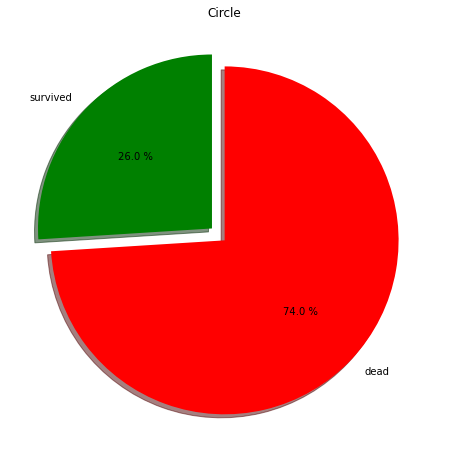

In [66]:
fig = plt.figure(figsize=(12,8))

# création d'un mask pour filtrer les données dans le Dataset du Titanic 
mask =  (titanic['survived'] == 1) & (titanic['sex'] == 'female' )

# pourcentage de surivantes 
survived =  round( mask.sum()/TOTAL, 2 ) * 100
dead = 100 - survived

colors = ['green', 'red']
x = [survived, dead]

labels = 'survived', 'dead'
explode = (0.1, 0)  

plt.pie(x, explode=explode, labels=labels, autopct='%.1f %%',
        shadow=True, startangle=90, colors=colors)
plt.title('Circle');

In [39]:
titanic



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


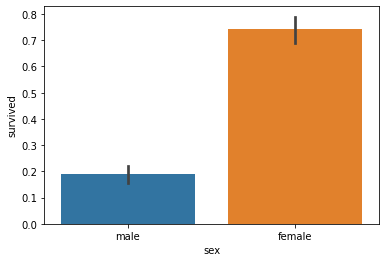

In [41]:
# graphique diagramme en bar 
sns.barplot(x = 'sex', y='survived',  data=titanic)

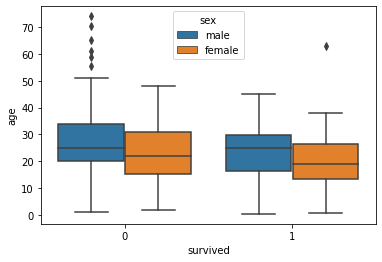

In [76]:
sns.boxplot(x='survived', y='age', hue='sex', data=titanic[titanic['pclass'] == 3]);

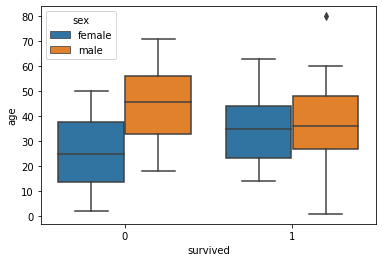

In [78]:
sns.boxplot(x='survived', y='age', hue='sex', data=titanic[titanic['pclass'] == 1]);

# outliers ce sont les valeurs que l'on ne prend pas en compte car non cohérente

In [84]:
mask = titanic['age'] > 70

titanic[mask]['age'].min()

70.5